In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [113]:
df = pd.read_csv('diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord,price
0,1,0.51,Premium,4,F,VS1,4,1749
1,2,2.25,Fair,1,G,I1,1,7069
2,3,0.70,Very Good,3,E,VS2,5,2757
3,4,0.47,Good,2,F,VS1,4,1243
4,5,0.30,Ideal,5,G,VVS1,7,789


In [114]:
df.isnull().sum()

Unnamed: 0     0
carat          0
cut            0
cut_ord        0
color          0
clarity        0
clarity_ord    0
price          0
dtype: int64

In [115]:
df.duplicated().sum()

0

In [116]:
df.describe()

,Unnamed: 0,carat,cut_ord,clarity_ord,price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,0.798597,3.903980,4.126700,3939.103500
std,14433.901067,0.474651,1.117043,1.665564,3995.879832
min,1.000000,0.200000,1.000000,1.000000,326.000000
25%,12500.750000,0.400000,3.000000,3.000000,948.000000
50%,25000.500000,0.700000,4.000000,4.000000,2402.500000
75%,37500.250000,1.040000,5.000000,5.000000,5331.000000
max,50000.000000,5.010000,5.000000,8.000000,18823.000000


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   50000 non-null  int64  
 1   carat        50000 non-null  float64
 2   cut          50000 non-null  object 
 3   cut_ord      50000 non-null  int64  
 4   color        50000 non-null  object 
 5   clarity      50000 non-null  object 
 6   clarity_ord  50000 non-null  int64  
 7   price        50000 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 3.1+ MB


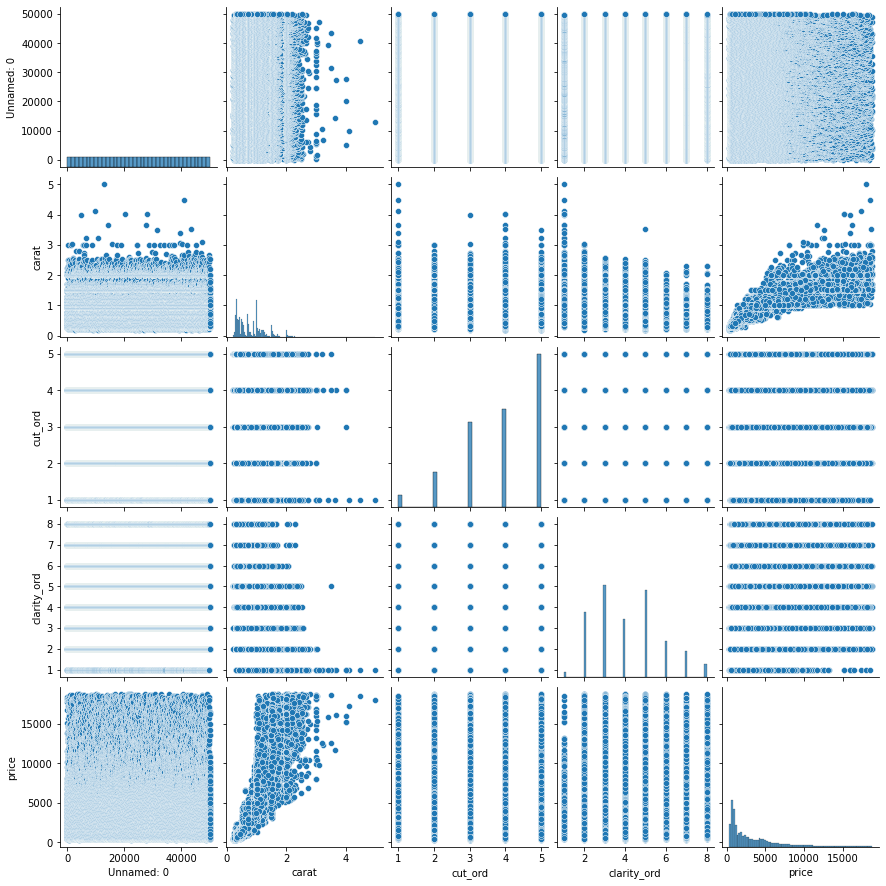

In [118]:
sns.pairplot(df)

<AxesSubplot:xlabel='carat', ylabel='price'>

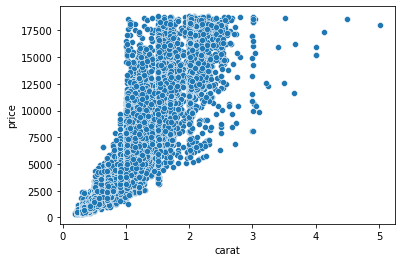

In [119]:
sns.scatterplot(data = df, x = 'carat', y = 'price')

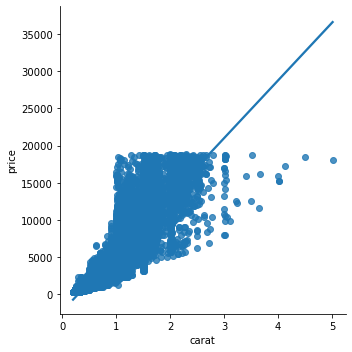

In [120]:
sns.lmplot(data = df, x= 'carat', y='price',)

In [121]:
df.drop(columns = ['Unnamed: 0']).head()

,carat,cut,cut_ord,color,clarity,clarity_ord,price
0,0.51,Premium,4,F,VS1,4,1749
1,2.25,Fair,1,G,I1,1,7069
2,0.70,Very Good,3,E,VS2,5,2757
3,0.47,Good,2,F,VS1,4,1243
4,0.30,Ideal,5,G,VVS1,7,789


In [122]:
import sklearn

In [123]:
y = df['price']
x = df.drop(['Unnamed: 0', 'price', 'cut_ord','clarity_ord'], axis=1)
x.head()

,carat,cut,color,clarity
0,0.51,Premium,F,VS1
1,2.25,Fair,G,I1
2,0.70,Very Good,E,VS2
3,0.47,Good,F,VS1
4,0.30,Ideal,G,VVS1


In [124]:
x = pd.get_dummies(x, columns=['clarity','color','cut'])
x

,carat,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,color_D,...,color_F,color_G,color_H,color_I,color_J,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0.51,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,2.25,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,0.70,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.47,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,0.30,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.71,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
49996,0.43,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
49997,1.14,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
49998,1.01,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [125]:
from sklearn.preprocessing import StandardScaler

In [126]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[-0.6080254 , -0.1179443 , -0.18536852, ..., -0.81571433,
         1.70548906, -0.53677612],
       [ 3.05785977,  8.47857874, -0.18536852, ..., -0.81571433,
        -0.58634208, -0.53677612],
       [-0.20772759, -0.1179443 , -0.18536852, ..., -0.81571433,
        -0.58634208,  1.86297407],
       ...,
       [ 0.71927785, -0.1179443 , -0.18536852, ..., -0.81571433,
         1.70548906, -0.53677612],
       [ 0.44538988, -0.1179443 , -0.18536852, ..., -0.81571433,
         1.70548906, -0.53677612],
       [ 2.0465811 , -0.1179443 , -0.18536852, ..., -0.81571433,
         1.70548906, -0.53677612]])

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.3, random_state =0)

In [129]:
from sklearn.linear_model import LinearRegression

In [130]:
model = LinearRegression()

In [131]:
model.fit(x_train,y_train)

LinearRegression()

In [132]:
print(model.intercept_)
print(model.coef_)

3935.5885606026786
[ 4.20664235e+03 -7.03534283e+13 -1.08385638e+14 -2.59008326e+14
 -2.27424896e+14 -2.17122267e+14 -2.53383492e+14 -1.51817900e+14
 -1.76496510e+14  3.07341510e+14  3.57454195e+14  3.54143052e+14
  3.77361738e+14  3.35092604e+14  2.80321929e+14  2.06265781e+14
 -1.98222928e+14 -3.34103589e+14 -5.69153703e+14 -5.07019633e+14
 -4.84218476e+14]


In [133]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [134]:
predictions = model.predict(x_val)
predictions

array([1193.5885606, 9004.0260606, 3172.2135606, ...,  837.4010606,
        172.0260606, 8401.3385606])

In [135]:
print(model.score(x_val,y_val))

0.9174034555305435


In [136]:
score = r2_score(predictions, y_val)
score

0.9081270138168197

In [137]:
model.fit(x,y)

LinearRegression()

In [138]:
df2 = pd.read_csv('new-diamonds.csv')
df2.head()

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord
0,1,1.22,Premium,4,G,SI1,3
1,2,1.01,Good,2,G,VS2,5
2,3,0.71,Very Good,3,I,VS2,5
3,4,1.01,Ideal,5,D,SI2,2
4,5,0.27,Ideal,5,H,VVS2,6


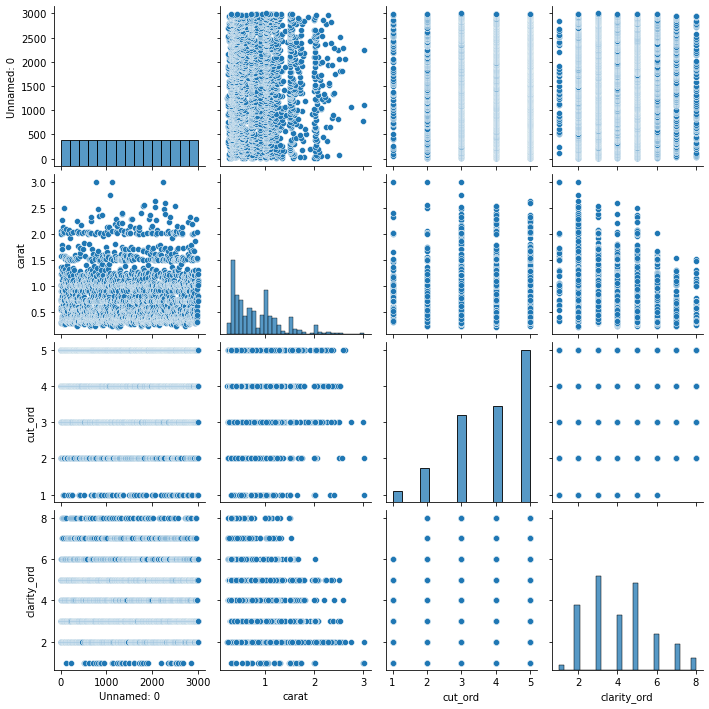

In [139]:
sns.pairplot(df2)

In [140]:
df2.describe()

,Unnamed: 0,carat,cut_ord,clarity_ord
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,0.795440,3.908667,4.119333
std,866.169729,0.475891,1.108182,1.663535
min,1.000000,0.210000,1.000000,1.000000
25%,750.750000,0.400000,3.000000,3.000000
50%,1500.500000,0.700000,4.000000,4.000000
75%,2250.250000,1.030000,5.000000,5.000000
max,3000.000000,3.010000,5.000000,8.000000


In [141]:
dff = df2.drop(columns = ['Unnamed: 0', 'cut_ord', 'clarity_ord'], axis = 1)
dff

,carat,cut,color,clarity
0,1.22,Premium,G,SI1
1,1.01,Good,G,VS2
2,0.71,Very Good,I,VS2
3,1.01,Ideal,D,SI2
4,0.27,Ideal,H,VVS2
...,...,...,...,...
2995,0.72,Ideal,F,SI2
2996,1.09,Premium,I,VS2
2997,1.05,Very Good,G,SI1
2998,0.70,Fair,G,SI1


In [142]:
df3 = pd.get_dummies(dff)
df3

,carat,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1.22,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1.01,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.71,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,1.01,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.27,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.72,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2996,1.09,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2997,1.05,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2998,0.70,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [143]:
model.fit(x,y)

LinearRegression()

In [144]:
pred2 = model.predict(df3)
pred2

C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([2.21185904e+14, 1.72780700e+15, 1.78895239e+15, ...,
       2.16387666e+14, 1.48033097e+14, 2.29611500e+14])

In [145]:
axx = df2.assign(predicted_prices = pred2)
axx

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord,predicted_prices
0,1,1.22,Premium,4,G,SI1,3,2.211859e+14
1,2,1.01,Good,2,G,VS2,5,1.727807e+15
2,3,0.71,Very Good,3,I,VS2,5,1.788952e+15
3,4,1.01,Ideal,5,D,SI2,2,7.987876e+14
4,5,0.27,Ideal,5,H,VVS2,6,1.569187e+15
...,...,...,...,...,...,...,...,...
2995,2996,0.72,Ideal,5,F,SI2,2,7.629791e+14
2996,2997,1.09,Premium,4,I,VS2,5,1.793751e+15
2997,2998,1.05,Very Good,3,G,SI1,3,2.163877e+14
2998,2999,0.70,Fair,1,G,SI1,3,1.480331e+14


In [146]:
df3.shape

(3000, 21)

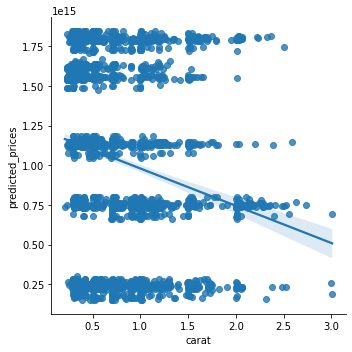

In [147]:
sns.lmplot(data = axx, x= 'carat', y='predicted_prices',)

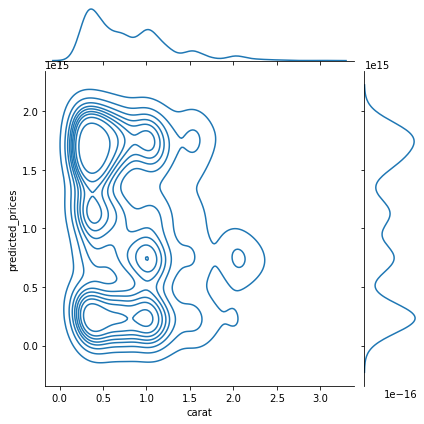

In [148]:
joint = sns.jointplot(data= axx, x='carat',y='predicted_prices', kind = 'kde')
plt.show()
joint

<AxesSubplot:>

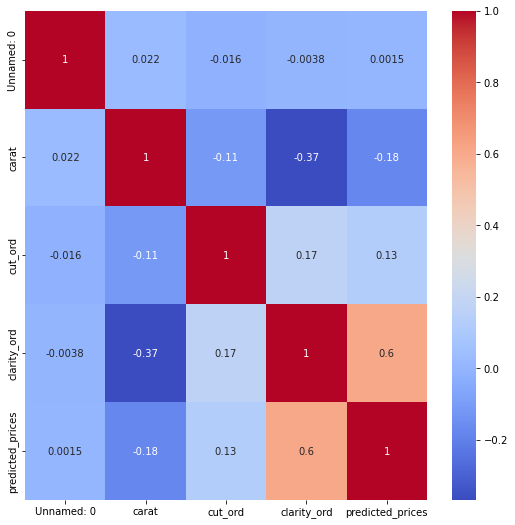

In [149]:
plt.figure(figsize = (9,9))
sns.heatmap(axx.corr(), annot=True, cmap = 'coolwarm')